In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ipl_matches.csv')

In [5]:
df.head(4)

id    Season       city        date                   team1  \
0   1  IPL-2017  Hyderabad  05-04-2017     Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017          Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017           Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017  Rising Pune Supergiant   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   
2  normal           0   Kolkata Knight Riders            0              10   
3  normal           0         Kings XI Punjab            0               6   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   
3      GJ Maxwell                     Holkar Cricket Stadium    AK Chaudhary   

         umpire2 umpire3  
0       NJ Llong     NaN  
1         S Ravi     NaN  
2      CK Nandan     NaN  
3  C Shamshuddin     NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
df['Season'] = df['Season'].str.extract(r'(\d{4})')

In [12]:
df['Season']=df['Season'].astype(int)

In [17]:
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    int32         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [19]:
df['umpire1'] = df['umpire1'].fillna('Unknown')
df['umpire2'] = df['umpire2'].fillna('Unknown')
df['umpire3'] = df['umpire3'].fillna('Unknown')
df['player_of_match'] = df['player_of_match'].fillna('Unknown')
df['city'] = df['city'].fillna('Dubai') 
df['winner'] = df['winner'].fillna('No Result')


In [20]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               756 non-null    bool 
 1   Season           756 non-null    bool 
 2   city             756 non-null    bool 
 3   date             756 non-null    bool 
 4   team1            756 non-null    bool 
 5   team2            756 non-null    bool 
 6   toss_winner      756 non-null    bool 
 7   toss_decision    756 non-null    bool 
 8   result           756 non-null    bool 
 9   dl_applied       756 non-null    bool 
 10  winner           756 non-null    bool 
 11  win_by_runs      756 non-null    bool 
 12  win_by_wickets   756 non-null    bool 
 13  player_of_match  756 non-null    bool 
 14  venue            756 non-null    bool 
 15  umpire1          756 non-null    bool 
 16  umpire2          756 non-null    bool 
 17  umpire3          756 non-null    bool 
dtypes: bool(18

<Axes: xlabel='win_by_runs'>

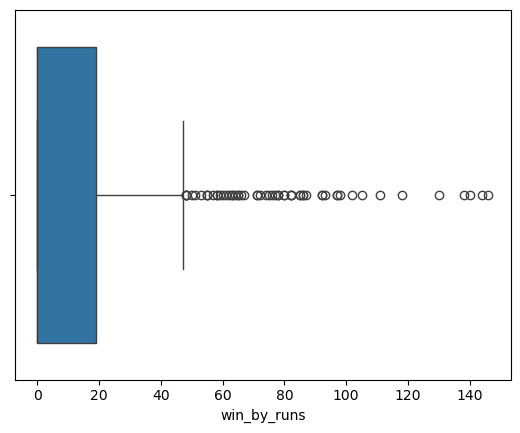

In [22]:
sns.boxplot(x='win_by_runs',data=df)

<Axes: xlabel='win_by_wickets'>

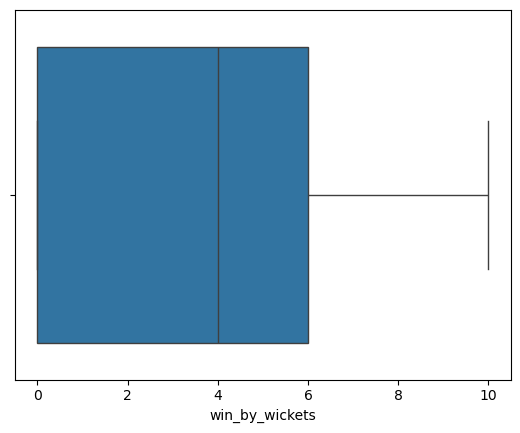

In [23]:
sns.boxplot(x='win_by_wickets',data=df)

In [24]:
df.to_csv('ipl_cleaned.csv', index=False)

In [29]:
df=df.drop(['id'],axis=1)

Text(0.5, 1.0, 'Heat map-Correlation')

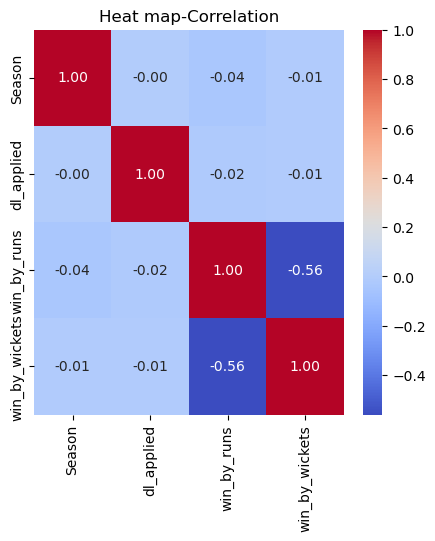

In [32]:
plt.figure(figsize=(5,5))
correlation=df.select_dtypes(include=[float,int]).corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heat map-Correlation')

In [2]:
df=pd.read_csv('ipl_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          756 non-null    ob

In [9]:
df_encoded = pd.get_dummies(df)

With lesser no of predictors X- DONE WITH BEST FEATURES

In [45]:
#DATA SPLITTING-1
x= df.drop(columns=['id', 'winner','date','umpire2','umpire3','player_of_match','umpire1'])
x= pd.get_dummies(x, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['winner'])
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 

In [46]:
#LOGISTIC REGRESSION-1
logreg= LogisticRegression(max_iter=1000)
logreg.fit(x_train_scaled, y_train)  
y_pred= logreg.predict(x_test_scaled)  


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

test_accuracy=logreg.score(x_test_scaled, y_test)
train_accuracy=logreg.score(x_train_scaled, y_train)
print('Training Accuracy: ',train_accuracy)
print('classification report: ')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.5594713656387665
Training Accuracy:  0.9187145557655955
classification report: 
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.38      0.33      0.35         9
           2       0.50      0.33      0.40         3
           3       0.56      0.25      0.34        20
           4       0.43      0.75      0.55         4
           5       0.29      0.16      0.21        25
           6       1.00      0.50      0.67         2
           7       0.55      0.79      0.65        28
           8       0.64      0.76      0.69        33
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         4
          11       0.48      0.59      0.53        22
          12       0.67      0.67      0.67         3
          13       0.50      1.00      0.67         1
          14       0.52      0.44      0.48        25
          15       0.70

In [47]:
#Hyper parameter tunning
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best hyperparameters: ',best_params)
print('Best cross-validation accuracy: ',best_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best hyperparameters:  {'C': 0.1}
Best cross-validation accuracy:  0.5464804063860667


In [48]:
final_log_model =LogisticRegression(C=100)  
final_log_model.fit(x_train_scaled, y_train)
y_pred_log = final_log_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred_log)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5154185022026432


In [31]:
#LOGISTIC REGRESSION MODEL-2
x= df.drop(columns=['id', 'winner','date','umpire2','umpire3','player_of_match','umpire1','win_by_runs','win_by_wickets'])
x= pd.get_dummies(x, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['winner'])
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 

logreg= LogisticRegression(max_iter=1000)
logreg.fit(x_train_scaled, y_train)  
y_pred= logreg.predict(x_test_scaled)  

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

test_accuracy=logreg.score(x_test_scaled, y_test)
train_accuracy=logreg.score(x_train_scaled, y_train)
print('Training Accuracy: ',train_accuracy)
print('Test Accuracy: ',test_accuracy)

Logistic Regression Accuracy: 0.5330396475770925
Training Accuracy:  0.9054820415879017
Test Accuracy:  0.5330396475770925


In [5]:
#DATA SPLITTING -1
x= df.drop(columns=['id', 'winner','date','umpire2','umpire3','player_of_match','umpire1'])
x= pd.get_dummies(x, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['winner'])
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

SVM MODEL

In [49]:
#SVM MODEL
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train_scaled, y_train)

y_pred_svm = svm.predict(x_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

test_accuracy = svm.score(x_test_scaled, y_test)
print('classification report: ')
print(classification_report(y_test,y_pred_svm))
print('Test Accuracy: ',test_accuracy)

SVM Accuracy: 0.6167400881057269
classification report: 
              precision    recall  f1-score   support

           0       0.56      0.63      0.59        30
           1       0.45      0.56      0.50         9
           2       0.33      0.33      0.33         3
           3       0.64      0.35      0.45        20
           4       0.43      0.75      0.55         4
           5       0.45      0.36      0.40        25
           6       0.00      0.00      0.00         2
           7       0.67      0.93      0.78        28
           8       0.75      0.82      0.78        33
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         4
          11       0.62      0.59      0.60        22
          12       0.75      1.00      0.86         3
          13       0.33      1.00      0.50         1
          14       0.71      0.48      0.57        25
          15       0.72      0.76      0.74        17

    accuracy           

In [50]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  
}
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=4)

In [51]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best hyperparameters: ',best_params)
print('Best cross-validation accuracy: ',best_score)

Best hyperparameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation accuracy:  0.7617924528301887


In [52]:
#SVM TUNNED MODEL
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
final_model = SVC(C=100, kernel='rbf', gamma='auto')  
final_model.fit(x_train_scaled, y_train)
y_pred = final_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5022026431718062


RANDOM FOREST CLASSIFIER

In [53]:
#RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print()
test_accuracy = rf.score(x_test_scaled, y_test)
train_accuracy = rf.score(x_train_scaled, y_train)
print('Training Accuracy: ',train_accuracy)

Random Forest Accuracy: 0.8281938325991189
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.78      0.78      0.78         9
           2       0.50      0.33      0.40         3
           3       0.89      0.85      0.87        20
           4       1.00      1.00      1.00         4
           5       0.95      0.76      0.84        25
           6       1.00      0.50      0.67         2
           7       0.78      1.00      0.88        28
           8       0.82      0.97      0.89        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.75      0.82      0.78        22
          12       0.50      0.33      0.40         3
          13       0.00      0.00      0.00         1
          14       1.00      0.84      0.91        25
          15       0.76      0.94      0.84        17

    accuracy                         

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]}


grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train_scaled, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best hyperparameters: ',best_params)
print('Best cross-validation accuracy: ',best_score)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best hyperparameters:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy:  0.8357402031930334


In [56]:
#TUNNED RF MODEL
best_params = grid_search.best_params_
final_model_rf = RandomForestClassifier(**best_params) 
final_model_rf.fit(x_train_scaled, y_train)

final_y_pred_rf = final_model_rf.predict(x_test_scaled)
accuracy_rf = accuracy_score(y_test, final_y_pred_rf)
print("Test Accuracy:", accuracy_rf)

print(classification_report(y_test,final_y_pred_rf))

Test Accuracy: 0.8061674008810573
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.75      0.67      0.71         9
           2       0.50      0.33      0.40         3
           3       0.89      0.80      0.84        20
           4       0.67      1.00      0.80         4
           5       0.88      0.60      0.71        25
           6       1.00      0.50      0.67         2
           7       0.73      0.96      0.83        28
           8       0.89      0.94      0.91        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.79      0.86      0.83        22
          12       1.00      0.33      0.50         3
          13       0.00      0.00      0.00         1
          14       0.96      0.88      0.92        25
          15       0.73      0.94      0.82        17

    accuracy                           0.81   

DECISION TREE CLASSIFIER

In [57]:
#DECISION TREE
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train_scaled, y_train)  
y_pred_dt=decision_tree.predict(x_test_scaled)  
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Decision Tree Accuracy: 0.8810572687224669
              precision    recall  f1-score   support

           0       0.64      0.83      0.72        30
           1       1.00      0.56      0.71         9
           2       1.00      0.33      0.50         3
           3       0.85      0.85      0.85        20
           4       1.00      1.00      1.00         4
           5       1.00      0.92      0.96        25
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00        28
           8       0.97      0.97      0.97        33
           9       0.00      0.00      0.00         1
          10       0.60      0.75      0.67         4
          11       1.00      0.95      0.98        22
          12       0.50      0.67      0.57         3
          13       0.00      0.00      0.00         1
          14       1.00      0.92      0.96        25
          15       0.93      0.82      0.88        17

    accuracy                         

TUNNED DECISION TREE

In [58]:
print(decision_tree.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [59]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],            
    'max_depth': [None, 5, 10, 20, 30, 50, 100],              
    'min_samples_split': [2, 5, 10, 20],                    
    'min_samples_leaf': [1, 2, 5, 10],                        
    'max_features': [None, 'sqrt', 'log2'],              
    'splitter': ['best', 'random']                            
}

grid_search = GridSearchCV(estimator=decision_tree,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
grid_search.fit(x_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score: 0.797789757412399


In [60]:
best_params = grid_search.best_params_
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(x_train_scaled, y_train)
y_pred = best_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8810572687224669
              precision    recall  f1-score   support

           0       0.64      0.83      0.72        30
           1       1.00      0.56      0.71         9
           2       1.00      0.33      0.50         3
           3       0.85      0.85      0.85        20
           4       1.00      1.00      1.00         4
           5       1.00      0.92      0.96        25
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00        28
           8       0.97      0.97      0.97        33
           9       0.00      0.00      0.00         1
          10       0.60      0.75      0.67         4
          11       1.00      0.95      0.98        22
          12       0.50      0.67      0.57         3
          13       0.00      0.00      0.00         1
          14       1.00      0.92      0.96        25
          15       0.93      0.82      0.88        17

    accuracy                           0.88   

KNN MODEL

In [61]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train_scaled, y_train) 
y_pred_knn = knn.predict(x_test_scaled) 

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print('classification report: ')
print(classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.46255506607929514
classification report: 
              precision    recall  f1-score   support

           0       0.30      0.67      0.41        30
           1       0.60      0.33      0.43         9
           2       0.00      0.00      0.00         3
           3       0.57      0.40      0.47        20
           4       0.50      1.00      0.67         4
           5       0.43      0.36      0.39        25
           6       1.00      0.50      0.67         2
           7       0.58      0.50      0.54        28
           8       0.63      0.58      0.60        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.48      0.45      0.47        22
          12       1.00      1.00      1.00         3
          13       0.50      1.00      0.67         1
          14       0.50      0.16      0.24        25
          15       0.50      0.53      0.51        17

    accuracy          

In [62]:
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNeighborsClassifier(n_neighbors = i)
        clf.fit(x_train_scaled,y_train)
        tmp = clf.predict(x_test_scaled)
        tmp = f1_score(y_test, tmp, average='weighted')
        error = 1-tmp
        test_error.append(error)
    
    return test_error

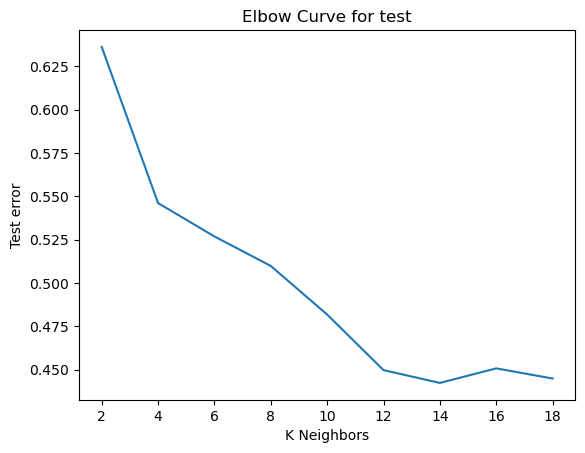

In [63]:
k = range(2, 20, 2)
test = Elbow(k)
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
plt.show()

In [64]:
knn = KNeighborsClassifier(n_neighbors=14)  
knn.fit(x_train_scaled, y_train) 
y_pred_knn= knn.predict(x_test_scaled) 

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
k_1 = f1_score(y_test,y_pred_knn,average='weighted')
print(k_1)
print('Classification Report: ')
print(classification_report(y_test,y_pred_knn))

KNN Accuracy: 0.5726872246696035
0.5576105777764955
Classification Report: 
              precision    recall  f1-score   support

           0       0.51      0.73      0.60        30
           1       0.29      0.22      0.25         9
           2       1.00      0.33      0.50         3
           3       0.52      0.55      0.54        20
           4       0.60      0.75      0.67         4
           5       0.61      0.44      0.51        25
           6       0.00      0.00      0.00         2
           7       0.68      0.68      0.68        28
           8       0.57      0.70      0.63        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.58      0.64      0.61        22
          12       1.00      0.33      0.50         3
          13       0.00      0.00      0.00         1
          14       0.71      0.40      0.51        25
          15       0.57      0.76      0.65        17

    

XG BOOST CLASSIFIER

In [6]:
#XGBOOST
import xgboost as xgb
xgboost_model= xgb.XGBClassifier(n_jobs=-1)
xgboost_model.fit(x_train_scaled, y_train)  

y_pred_xgb=xgboost_model.predict(x_test_scaled)  
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
r2score = r2_score(y_test,y_pred_xgb)
print('r2 score: ',r2score)
print('Classification Report: ')
print(classification_report(y_test,y_pred_xgb))

XGBoost Accuracy: 0.9251101321585903
r2 score:  0.7884845560503864
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       1.00      1.00      1.00         9
           2       0.50      0.33      0.40         3
           3       0.94      0.85      0.89        20
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        25
           6       1.00      0.50      0.67         2
           7       0.97      1.00      0.98        28
           8       1.00      0.97      0.98        33
           9       0.00      0.00      0.00         1
          10       0.60      0.75      0.67         4
          11       0.88      1.00      0.94        22
          12       1.00      0.67      0.80         3
          13       0.00      0.00      0.00         1
          14       1.00      0.96      0.98        25
          15       0.74      1.00      0.85 

In [66]:
params = {
        'n_estimators' : [100, 200, 500, 750], 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25], 
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 10
xgboost = RandomizedSearchCV(xgboost_model, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=3, verbose=3, random_state=42)

xgboost.fit(x_train_scaled, y_train)

best_params = xgboost.best_params_
xgboosting = xgb.XGBClassifier(**best_params)
xgboosting.fit(x_train_scaled,y_train)

pred_hpt = xgboosting.predict(x_test_scaled)
r2score = r2_score(y_test,pred_hpt)
print('r2 score: ',r2score)
print("XGBoost Accuracy:", accuracy_score(y_test,pred_hpt))
best_score = xgboost.best_score_
print('Best cross-validation accuracy: ',best_score)
print('Classification Report: ')
print(classification_report(y_test,pred_hpt))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
r2 score:  0.8537002052827923
XGBoost Accuracy: 0.947136563876652
Best cross-validation accuracy:  0.9035695942475602
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       1.00      1.00      1.00         9
           2       0.33      0.33      0.33         3
           3       0.95      1.00      0.98        20
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        25
           6       1.00      0.50      0.67         2
           7       0.97      1.00      0.98        28
           8       1.00      1.00      1.00        33
           9       0.00      0.00      0.00         1
          10       1.00      0.25      0.40         4
          11       1.00      1.00      1.00        22
          12       1.00      0.67      0.80         3
          13       0.00      0.00      0

MODEL ACCURACY

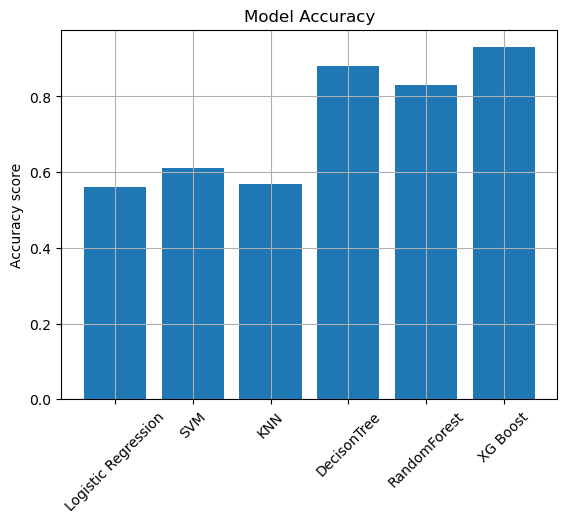

In [13]:
values=[0.56,0.61,0.57,0.88,0.83,0.93]
model=['Logistic Regression','SVM','KNN','DecisonTree','RandomForest','XG Boost']
import matplotlib.pyplot as plt
plt.bar(model,values)
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Feature Importance oF MODELS

In [11]:
label_encoder = LabelEncoder()
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x=df.drop(columns=['id','winner'])
y=df['winner']
scaler=StandardScaler()
features = scaler.fit_transform(x)
target = scaler.fit_transform(x)
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [10]:
import xgboost as xgb
xgboost_model= xgb.XGBClassifier(n_jobs=-1)
xgboost_model.fit(x_train, y_train)  
y_pred_xgb=xgboost_model.predict(x_test)  
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print('Classification Report: ')
print(classification_report(y_test,y_pred_xgb))

XGBoost Accuracy: 0.9383259911894273
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00         9
           2       1.00      0.33      0.50         3
           3       1.00      0.85      0.92        20
           4       1.00      1.00      1.00         4
           5       0.92      0.92      0.92        25
           6       1.00      0.50      0.67         2
           7       0.97      1.00      0.98        28
           8       0.91      0.97      0.94        33
           9       0.50      1.00      0.67         1
          10       1.00      0.25      0.40         4
          11       0.88      1.00      0.94        22
          12       1.00      1.00      1.00         3
          13       0.00      0.00      0.00         1
          14       1.00      0.96      0.98        25
          15       0.81      1.00      0.89        17

    accuracy       

In [12]:
features1 =x_train.columns
importance_df = pd.DataFrame({
    'Feature': features1,
    'Importance': xgboost_model.feature_importances_})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
5       toss_winner    0.153387
7            result    0.133442
9       win_by_runs    0.121498
4             team2    0.108730
12            venue    0.103330
3             team1    0.092749
10   win_by_wickets    0.066710
1              city    0.055269
0            Season    0.049597
2              date    0.034763
15          umpire3    0.027158
11  player_of_match    0.018585
6     toss_decision    0.014397
13          umpire1    0.011187
14          umpire2    0.009199
8        dl_applied    0.000000


In [39]:
print(*zip(le.classes_, le.transform(le.classes_)),sep='\n')

('Chennai Super Kings', 0)
('Deccan Chargers', 1)
('Delhi Capitals', 2)
('Delhi Daredevils', 3)
('Gujarat Lions', 4)
('Kings XI Punjab', 5)
('Kochi Tuskers Kerala', 6)
('Kolkata Knight Riders', 7)
('Mumbai Indians', 8)
('No Result', 9)
('Pune Warriors', 10)
('Rajasthan Royals', 11)
('Rising Pune Supergiant', 12)
('Rising Pune Supergiants', 13)
('Royal Challengers Bangalore', 14)
('Sunrisers Hyderabad', 15)


In [13]:
#LOGISTIC REGRESSION
logreg= LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)  
y_pred= logreg.predict(x_test)  
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.35      0.50      0.41        30
           1       0.22      0.22      0.22         9
           2       0.33      0.33      0.33         3
           3       0.20      0.05      0.08        20
           4       1.00      0.25      0.40         4
           5       0.11      0.04      0.06        25
           6       0.00      0.00      0.00         2
           7       0.33      0.46      0.38        28
           8       0.21      0.21      0.21        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.19      0.23      0.21        22
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.45      0.52      0.48        25
          15       0.32      0.41      0.36        17

    accuracy                           0.29       227
  

In [14]:
# LOG REG FEATURE IMPORTANCE
import numpy as np
importance = np.abs(logreg.coef_[0])
importance_df=pd.DataFrame({'Feature': x_train.columns,'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
4             team2    0.265333
3             team1    0.171340
5       toss_winner    0.146148
15          umpire3    0.049753
9       win_by_runs    0.033333
10   win_by_wickets    0.030878
6     toss_decision    0.027126
12            venue    0.022694
1              city    0.016054
13          umpire1    0.015106
11  player_of_match    0.004768
0            Season    0.004410
2              date    0.004237
7            result    0.002750
14          umpire2    0.002021
8        dl_applied    0.000530


In [17]:
#SVM MODEL
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test,y_pred_svm))

SVM Accuracy: 0.32158590308370044
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        30
           1       0.20      0.22      0.21         9
           2       0.50      0.33      0.40         3
           3       0.40      0.10      0.16        20
           4       0.50      0.75      0.60         4
           5       0.32      0.24      0.27        25
           6       0.00      0.00      0.00         2
           7       0.34      0.54      0.42        28
           8       0.21      0.24      0.23        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.28      0.23      0.25        22
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.45      0.36      0.40        25
          15       0.37      0.41      0.39        17

    accuracy                           0.32   

In [20]:
# RFE ON SVM
rfe = RFE(estimator=svm, n_features_to_select=5)
rfe.fit(x_train, y_train)
selected_features = x_train.columns[rfe.support_]
ranking = rfe.ranking_
rfe_df = pd.DataFrame({'Feature': x_train.columns,'Selected': rfe.support_,'Ranking': rfe.ranking_})
print(rfe_df.sort_values(by='Ranking').head(30))

            Feature  Selected  Ranking
0            Season      True        1
7            result      True        1
6     toss_decision      True        1
4             team2      True        1
8        dl_applied      True        1
9       win_by_runs     False        2
3             team1     False        3
15          umpire3     False        4
10   win_by_wickets     False        5
5       toss_winner     False        6
1              city     False        7
12            venue     False        8
14          umpire2     False        9
13          umpire1     False       10
11  player_of_match     False       11
2              date     False       12


In [21]:
importance_df_svm = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': np.abs(svm.coef_[0])
})

importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)
print("SVM Feature Importance:")
print(importance_df_svm)

SVM Feature Importance:
            Feature    Importance
6     toss_decision  8.501772e-01
8        dl_applied  6.310666e-01
10   win_by_wickets  3.757355e-01
4             team2  9.466362e-02
13          umpire1  8.555781e-02
3             team1  5.646644e-02
1              city  5.381445e-02
0            Season  4.558721e-02
14          umpire2  1.668608e-02
12            venue  1.263920e-02
11  player_of_match  1.100403e-02
2              date  9.766112e-03
5       toss_winner  9.350008e-03
9       win_by_runs  6.164295e-03
15          umpire3  3.979039e-13
7            result  1.776357e-14


In [26]:
#RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
print()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.75      0.67      0.71         9
           2       1.00      0.33      0.50         3
           3       0.80      0.80      0.80        20
           4       1.00      1.00      1.00         4
           5       0.83      0.60      0.70        25
           6       0.00      0.00      0.00         2
           7       0.76      0.89      0.82        28
           8       0.71      0.91      0.80        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.82      0.82      0.82        22
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.81      0.84      0.82        25
          15       0.85      1.00      0.92        17

    accuracy                           0.80       227
   macro avg       0.58   

In [27]:
#feature importamce
importances=rf.feature_importances_
importance_df=pd.DataFrame({'Feature': x_train.columns,'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(30))

            Feature  Importance
4             team2    0.163341
3             team1    0.113140
5       toss_winner    0.102466
11  player_of_match    0.085019
12            venue    0.073943
9       win_by_runs    0.072295
2              date    0.067691
10   win_by_wickets    0.067416
1              city    0.064737
13          umpire1    0.055317
14          umpire2    0.052600
0            Season    0.046393
6     toss_decision    0.014290
15          umpire3    0.012896
7            result    0.005474
8        dl_applied    0.002983


In [30]:
#DECISION TREE
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)  
y_pred_dt=decision_tree.predict(x_test)  
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print('Classification Report: ')
print(classification_report(y_test,y_pred_dt))

Decision Tree Accuracy: 0.8149779735682819
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       1.00      0.89      0.94         9
           2       1.00      0.33      0.50         3
           3       0.89      0.80      0.84        20
           4       1.00      1.00      1.00         4
           5       0.87      0.80      0.83        25
           6       1.00      0.50      0.67         2
           7       0.83      0.86      0.84        28
           8       0.75      0.82      0.78        33
           9       0.00      0.00      0.00         1
          10       0.67      1.00      0.80         4
          11       0.82      0.82      0.82        22
          12       0.50      0.33      0.40         3
          13       0.00      0.00      0.00         1
          14       0.95      0.84      0.89        25
          15       0.71      0.88      0.79        17

    accuracy 

In [31]:
importances=decision_tree.feature_importances_
importance_df=pd.DataFrame({'Feature': x_train.columns,'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(50))

            Feature  Importance
4             team2    0.320613
3             team1    0.267885
10   win_by_wickets    0.122419
9       win_by_runs    0.093427
5       toss_winner    0.058043
1              city    0.024826
12            venue    0.019475
6     toss_decision    0.017847
13          umpire1    0.017295
2              date    0.016489
11  player_of_match    0.015834
0            Season    0.015659
14          umpire2    0.004919
7            result    0.003162
8        dl_applied    0.002108
15          umpire3    0.000000


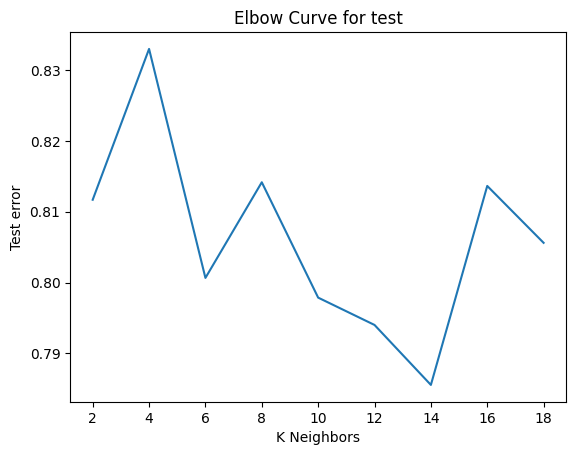

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train, y_train) 
y_pred_knn = knn.predict(x_test) 
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNeighborsClassifier(n_neighbors = i)
        clf.fit(x_train,y_train)
        tmp = clf.predict(x_test)
        tmp = f1_score(y_test, tmp, average='weighted')
        error = 1-tmp
        test_error.append(error)
    
    return test_error
k = range(2, 20, 2)
test = Elbow(k)
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)  
knn.fit(x_train, y_train) 
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.28      0.60      0.38        30
           1       0.29      0.22      0.25         9
           2       0.00      0.00      0.00         3
           3       0.11      0.05      0.07        20
           4       0.33      0.25      0.29         4
           5       0.12      0.12      0.12        25
           6       0.00      0.00      0.00         2
           7       0.24      0.25      0.25        28
           8       0.25      0.21      0.23        33
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.29      0.18      0.22        22
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         1
          14       0.16      0.12      0.14        25
          15       0.32      0.35      0.33        17

    accuracy                           0.23       227
   macro avg       0.21   

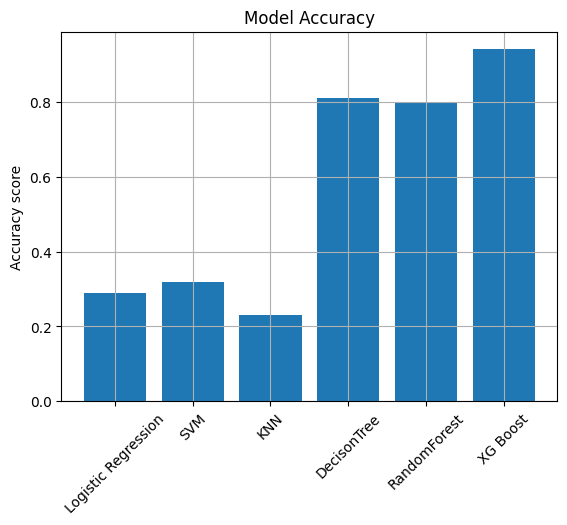

In [14]:
values=[0.29,0.32,0.23,0.81,0.80,0.94]
model=['Logistic Regression','SVM','KNN','DecisonTree','RandomForest','XG Boost']
import matplotlib.pyplot as plt
plt.bar(model,values)
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

BEST MODEL IS XG BOOST AS IT HAS THE HIGHEST ACCURACY and best cross validation score AMONG THE MODELS